# **UNSUPERVISED MACHINE LEARNING | CLUSTERING SONGS**

## 1.Project description

### 1.1. Introduction

The purpose of this project is to use K-means clustering algorithm to cluster similar songs, thus creating playlists in an automated way.

### 1.2. Business Problem / Objective

Automate the building of Spotify playlists using the spotipy API using K-means clustering algorithm to cluster similar songs in playlists

### 1.3. Dataset

I will use a database with 5000 songs.

### 1.6. Methods & Technologies

**Methods Used**

API-Calls

Data Engineering

Data Visualization

Unsupervised Machine Learning



**Technologies**

Python

Pandas

Jupyter Notebook

Requests (api)

Matplotlib

SciKit Learn *Spotipy

# 2.Data Preparation

## 2.1.Read the data

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np

In [ ]:
# get the data and create dataframe
url = "https://drive.google.com/file/d/1wVoH6-jrOkT3gqDhwAMaCTpwZHbZscXQ/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

df_original = pd.read_csv(path)
df_original.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


## 2.2.Initial quick exploration

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [ ]:
# deleting spaces from column names
df_original.columns  = df_original.columns.str.replace("^[ ]+|[ ]+$", "", regex=True)

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
 15  time_signature    5235 non-null   int64  
 16  id                5235 non-null   object 


## 2.3.Drop unwanted features

In [ ]:
# set index to columns "name" and "artist", because they are not numeric data
df_original = df_original.set_index(["name", "artist"])

# drop columns
df_original = df_original.drop(columns=["type", "id", "html", "mode", "time_signature", "key", "duration_ms"])
df_original

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,Chico César,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,Kurt Elling,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573


## 2.4.Remove outlier values

In [ ]:
# remove outlier values (https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)
import pandas as pd
import numpy as np
from scipy import stats


df = df_original[(np.abs(stats.zscore(df_original)) < 3).all(axis=1)]
df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.3990,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
Mulher Eu Sei,Chico César,0.7050,0.0502,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,Kurt Elling,0.6510,0.1190,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
Desafinado,Stan Getz,0.4660,0.1460,-17.500,0.0649,0.931,0.154000,0.1070,0.4230,142.885
Madalena,Maria Gasolina,0.6750,0.2070,-13.820,0.0545,0.963,0.414000,0.1120,0.6840,93.531
...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.3860,0.1240,-22.869,0.0440,0.945,0.917000,0.0853,0.3190,142.307
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.0619,0.0830,-25.543,0.0452,0.935,0.651000,0.0860,0.0261,61.525
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.0694,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4849 entries, ('Saudade De Bahia                                                                                                                                                                 ', 'Antônio Carlos Jobim                            ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4849 non-null   float64
 1   energy            4849 non-null   float64
 2   loudness          4849 non-null   float64
 3   speechiness       4849 non-null   float64
 4   acousticness      4849 non-null   float64
 5   instrumentalness  4849 non-null   float64
 6   liveness          4849 non-null   float64
 7   valence

## 2.5.Visualize the data

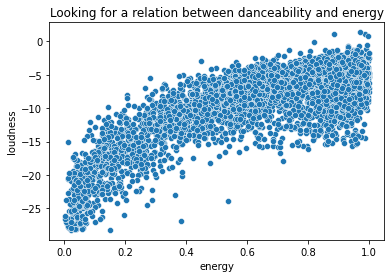

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='energy', y='loudness')
plt.title('Looking for a relation between danceability and energy')
plt.show()

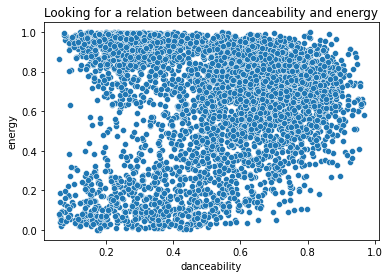

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='danceability', y='energy')
plt.title('Looking for a relation between danceability and energy')
plt.show()

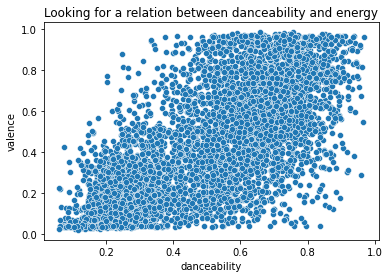

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='danceability', y='valence')
plt.title('Looking for a relation between danceability and energy')
plt.show()

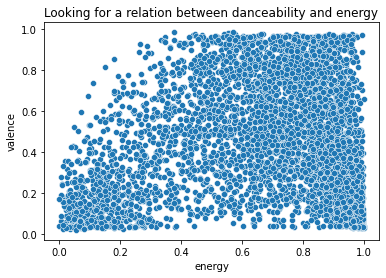

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='energy', y='valence')
plt.title('Looking for a relation between danceability and energy')
plt.show()

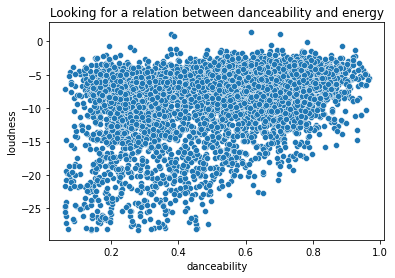

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='danceability', y='loudness')
plt.title('Looking for a relation between danceability and energy')
plt.show()

# 3.Data Modeling

## 3.1. Data scaling

In [ ]:
# Use the transformer "MinMaxScaler" to scale data

# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
scaled_df = MinMaxScaler(feature_range=(0,1))
 
# 3. fit the transformer to the data
scaled_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features_1000 = scaled_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
scaled_df = pd.DataFrame(scaled_audio_features_1000,
             index=df.index,
             columns=df.columns)

scaled_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.526649,0.043892,0.218090,0.000002,0.154725,0.697535,0.510537
Mulher Eu Sei,Chico César,0.710625,0.049313,0.341579,0.089612,0.883417,0.000041,0.603929,0.522478,0.397299
Rosa Morena,Kurt Elling,0.650983,0.118250,0.284322,0.056328,0.920603,0.000348,0.149895,0.396105,0.485092
Desafinado,Stan Getz,0.446653,0.145303,0.362390,0.154718,0.935678,0.156345,0.154725,0.417858,0.621347
Madalena,Maria Gasolina,0.677491,0.206425,0.486921,0.116679,0.967839,0.420305,0.162776,0.688212,0.314896
...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.358295,0.123260,0.180705,0.078274,0.949749,0.930964,0.119787,0.310131,0.617758
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.000331,0.082178,0.090217,0.082663,0.939698,0.660914,0.120915,0.006733,0.116163
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.155070,0.068551,0.163074,0.090344,0.921608,0.725888,0.116406,0.047545,0.279969


In [ ]:
scaled_df_woindex = scaled_df.reset_index()
scaled_df_woindex

,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Saudade De Bahia ...,Antônio Carlos Jobim,0.751491,0.398807,0.526649,0.043892,0.218090,0.000002,0.154725,0.697535,0.510537
1,Mulher Eu Sei ...,Chico César,0.710625,0.049313,0.341579,0.089612,0.883417,0.000041,0.603929,0.522478,0.397299
2,Rosa Morena ...,Kurt Elling,0.650983,0.118250,0.284322,0.056328,0.920603,0.000348,0.149895,0.396105,0.485092
3,Desafinado ...,Stan Getz,0.446653,0.145303,0.362390,0.154718,0.935678,0.156345,0.154725,0.417858,0.621347
4,Madalena ...,Maria Gasolina,0.677491,0.206425,0.486921,0.116679,0.967839,0.420305,0.162776,0.688212,0.314896
...,...,...,...,...,...,...,...,...,...,...,...
4844,"Music for Strings, Percussion and Celesta, BB ...",Béla Bartók,0.358295,0.123260,0.180705,0.078274,0.949749,0.930964,0.119787,0.310131,0.617758
4845,A Flock Descends Into The Pentagonal Garden ...,Toru Takemitsu,0.000331,0.082178,0.090217,0.082663,0.939698,0.660914,0.120915,0.006733,0.116163
4846,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.155070,0.068551,0.163074,0.090344,0.921608,0.725888,0.116406,0.047545,0.279969
4847,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.139607,0.100214,0.214409,0.079005,0.859296,0.432487,0.094188,0.016470,0.250338


In [ ]:
scaled_df_woindex.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000
mean,0.497491,0.665755,0.654461,0.196140,0.278075,0.256140,0.256478,0.443422,0.472511
std,0.240403,0.277952,0.176471,0.198948,0.349004,0.371982,0.182737,0.287124,0.172155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274354,0.498004,0.582485,0.057791,0.001869,0.000001,0.131219,0.187901,0.336318
50%,0.530594,0.743491,0.708098,0.117776,0.086131,0.001868,0.183706,0.414750,0.476119
75%,0.694058,0.897797,0.777402,0.265179,0.525628,0.617259,0.343101,0.685105,0.565669
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


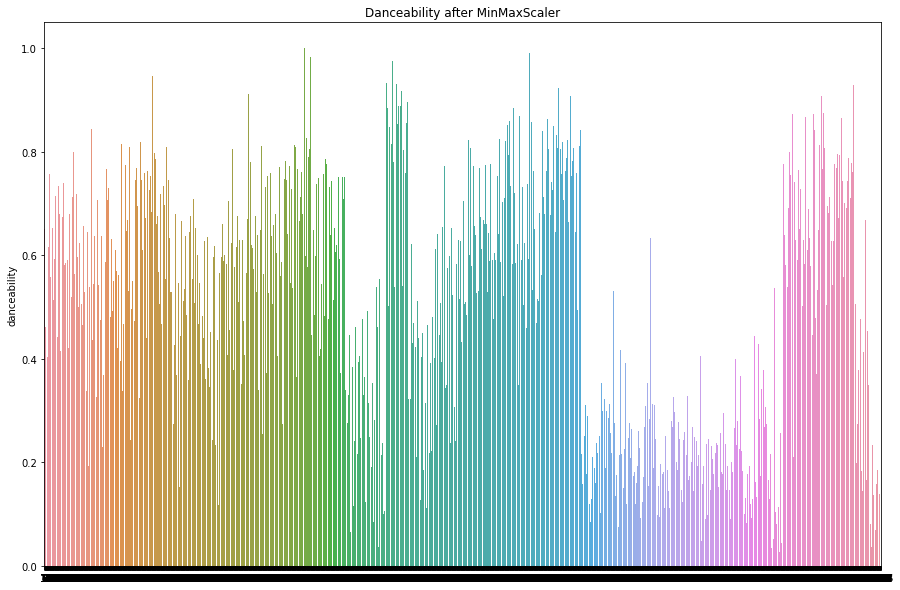

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=scaled_df_woindex, x=scaled_df_woindex.index, y="danceability")
plt.title("Danceability after MinMaxScaler")
plt.show()

## 3.2.Choose the right K-Value of clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
kmeans.cluster_centers_

array([[0.64215305, 0.7084488 , 0.72738725, 0.18650084, 0.20311837,
        0.02127249, 0.25609064, 0.60254946, 0.48265257],
       [0.2562808 , 0.9062744 , 0.6906183 , 0.30038398, 0.01242686,
        0.61261261, 0.29480679, 0.22302456, 0.49339815],
       [0.36375225, 0.18843853, 0.36544398, 0.08119586, 0.89608393,
        0.52264685, 0.20390629, 0.23319098, 0.41004093]])

In [ ]:
kmeans.inertia_

1469.184556848964

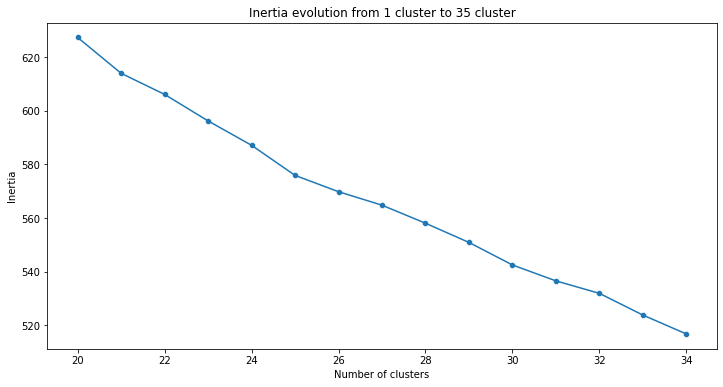

In [ ]:
max_k = 35
inertia = []

for k in range(20, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_df).inertia_)



fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(20, max_k), y=inertia)
sns.scatterplot(x=range(20, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

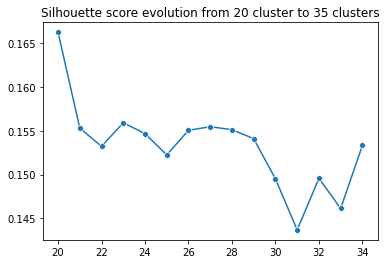

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#silhouette_score(df_scaled, myKMeans.labels_)

max_k = 35
sil_score = []

for k in range(20, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_df).labels_
    sil_score.append(silhouette_score(scaled_df, labels))

plt.title(f'Silhouette score evolution from 20 cluster to {max_k} clusters')
sns.lineplot(x=range(20, max_k), y=sil_score, marker='o')
plt.show()
# Looking to the figure, I will set the k value to ..

## 3.3.Apply K-means to create clusters

In [ ]:
# 1. import the model
from sklearn.cluster import KMeans
 
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 30)
 
# 3. fit the model to the data
my_kmeans.fit(scaled_df) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = my_kmeans.predict(scaled_df) # pass your scaled data here
 
# 5. attach the cluster output to our original DataFrame
scaled_df["clusters"] = clusters
scaled_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.526649,0.043892,0.218090,0.000002,0.154725,0.697535,0.510537,11
Mulher Eu Sei,Chico César,0.710625,0.049313,0.341579,0.089612,0.883417,0.000041,0.603929,0.522478,0.397299,28
Rosa Morena,Kurt Elling,0.650983,0.118250,0.284322,0.056328,0.920603,0.000348,0.149895,0.396105,0.485092,6
Desafinado,Stan Getz,0.446653,0.145303,0.362390,0.154718,0.935678,0.156345,0.154725,0.417858,0.621347,6
Madalena,Maria Gasolina,0.677491,0.206425,0.486921,0.116679,0.967839,0.420305,0.162776,0.688212,0.314896,28
...,...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.358295,0.123260,0.180705,0.078274,0.949749,0.930964,0.119787,0.310131,0.617758,7
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.000331,0.082178,0.090217,0.082663,0.939698,0.660914,0.120915,0.006733,0.116163,25
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.155070,0.068551,0.163074,0.090344,0.921608,0.725888,0.116406,0.047545,0.279969,25


In [ ]:
# group the clusters by mean
a = scaled_df.groupby(by="clusters").mean()
a

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
clusters,,,,,,,,,
0,0.573709,0.808415,0.772788,0.132217,0.067134,0.026190,0.591345,0.386537,0.486109
1,0.551266,0.691911,0.691213,0.196204,0.552604,0.018912,0.245084,0.813549,0.762502
2,0.588676,0.343379,0.470798,0.108545,0.809221,0.809379,0.225409,0.527751,0.451182
3,0.199057,0.956229,0.719195,0.496027,0.008187,0.830082,0.245558,0.112475,0.385254
4,0.769742,0.805916,0.777447,0.161827,0.115800,0.011690,0.149333,0.834010,0.434083
5,0.240921,0.957225,0.734602,0.425135,0.004165,0.066833,0.174201,0.155964,0.461975
6,0.500644,0.247771,0.525234,0.077176,0.844963,0.018817,0.217213,0.303114,0.374561
7,0.268314,0.121782,0.244871,0.078499,0.947344,0.886466,0.178553,0.142442,0.653512
8,0.797030,0.707909,0.753373,0.714523,0.196462,0.006472,0.272249,0.648275,0.334436


In [ ]:
# look at the centroids of the clusters
centroids = my_kmeans.cluster_centers_
scaled_df_centroids = pd.DataFrame(centroids)

scaled_df_centroids

,0,1,2,3,4,5,6,7,8
0,0.573709,0.808415,0.772788,0.132217,0.067134,0.026190,0.591345,0.386537,0.486109
1,0.551266,0.691911,0.691213,0.196204,0.552604,0.018912,0.245084,0.813549,0.762502
2,0.588676,0.343379,0.470798,0.108545,0.809221,0.809379,0.225409,0.527751,0.451182
3,0.199057,0.956229,0.719195,0.496027,0.008187,0.830082,0.245558,0.112475,0.385254
4,0.769742,0.805916,0.777447,0.161827,0.115800,0.011690,0.149333,0.834010,0.434083
5,0.240921,0.957225,0.734602,0.425135,0.004165,0.066833,0.174201,0.155964,0.461975
6,0.500644,0.247771,0.525234,0.077176,0.844963,0.018817,0.217213,0.303114,0.374561
7,0.268314,0.121782,0.244871,0.078499,0.947344,0.886466,0.178553,0.142442,0.653512
8,0.797030,0.707909,0.753373,0.714523,0.196462,0.006472,0.272249,0.648275,0.334436
9,0.676918,0.624536,0.675808,0.143389,0.652827,0.017857,0.288816,0.833754,0.395625


In [ ]:
scaled_df_centroids.columns = ["danceability", "energy", "loudness", "valence", "tempo","speechiness", "acousticness","instrumentalness","liveness"]
scaled_df_centroids

,danceability,energy,loudness,valence,tempo,speechiness,acousticness,instrumentalness,liveness
0,0.573709,0.808415,0.772788,0.132217,0.067134,0.026190,0.591345,0.386537,0.486109
1,0.551266,0.691911,0.691213,0.196204,0.552604,0.018912,0.245084,0.813549,0.762502
2,0.588676,0.343379,0.470798,0.108545,0.809221,0.809379,0.225409,0.527751,0.451182
3,0.199057,0.956229,0.719195,0.496027,0.008187,0.830082,0.245558,0.112475,0.385254
4,0.769742,0.805916,0.777447,0.161827,0.115800,0.011690,0.149333,0.834010,0.434083
5,0.240921,0.957225,0.734602,0.425135,0.004165,0.066833,0.174201,0.155964,0.461975
6,0.500644,0.247771,0.525234,0.077176,0.844963,0.018817,0.217213,0.303114,0.374561
7,0.268314,0.121782,0.244871,0.078499,0.947344,0.886466,0.178553,0.142442,0.653512
8,0.797030,0.707909,0.753373,0.714523,0.196462,0.006472,0.272249,0.648275,0.334436
9,0.676918,0.624536,0.675808,0.143389,0.652827,0.017857,0.288816,0.833754,0.395625


In [ ]:
scaled_df.groupby(by="clusters").count()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
clusters,,,,,,,,,
0,195,195,195,195,195,195,195,195,195
1,88,88,88,88,88,88,88,88,88
2,63,63,63,63,63,63,63,63,63
3,168,168,168,168,168,168,168,168,168
4,332,332,332,332,332,332,332,332,332
5,200,200,200,200,200,200,200,200,200
6,145,145,145,145,145,145,145,145,145
7,130,130,130,130,130,130,130,130,130
8,182,182,182,182,182,182,182,182,182


# 4.Cluster exploration

## 4.1.Plotting

<AxesSubplot:>

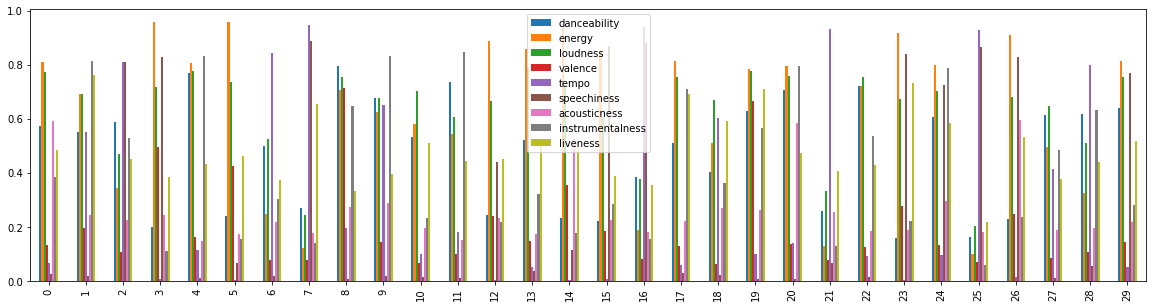

In [ ]:
scaled_df_centroids.plot.bar(figsize = (20,5))

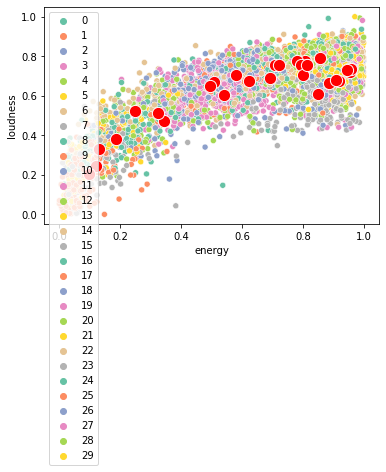

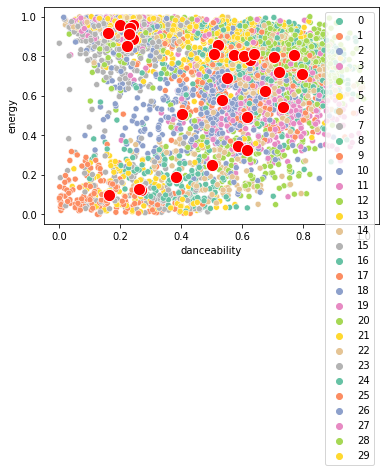

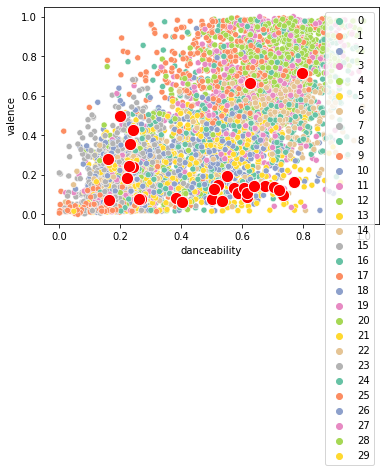

In [ ]:
sns.scatterplot(data=scaled_df, x='energy', y='loudness', hue='clusters', palette='Set2')
sns.scatterplot(data=scaled_df_centroids, x='energy', y='loudness', color='red', s=150)
plt.show()

sns.scatterplot(data=scaled_df, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=scaled_df_centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

sns.scatterplot(data=scaled_df, x='danceability', y='valence', hue='clusters', palette='Set2')
sns.scatterplot(data=scaled_df_centroids, x='danceability', y='valence', color='red', s=150)
plt.show()

In [ ]:
features = ["danceability", "energy", "loudness", "valence", "tempo","speechiness", "acousticness","instrumentalness","liveness"]

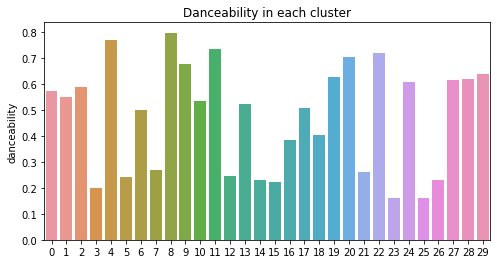

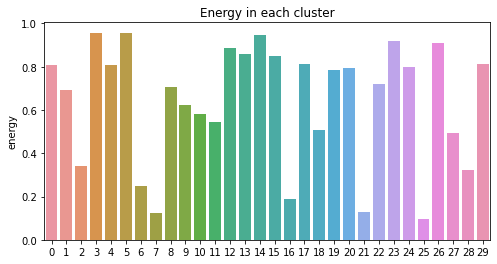

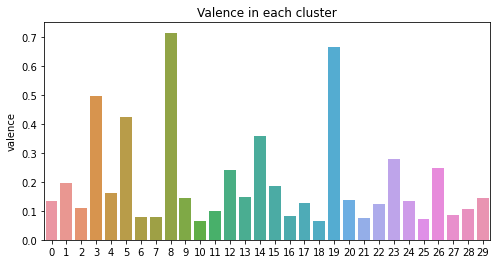

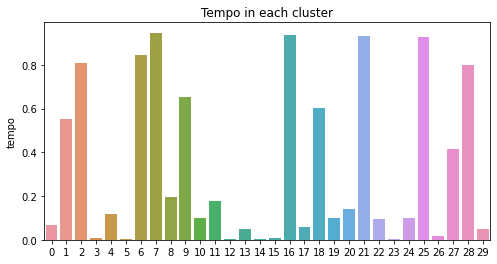

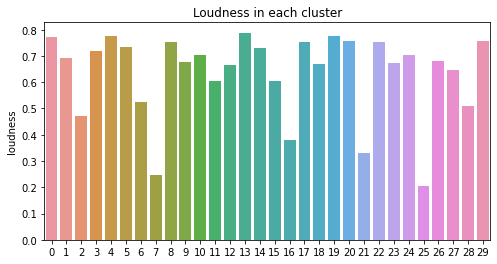

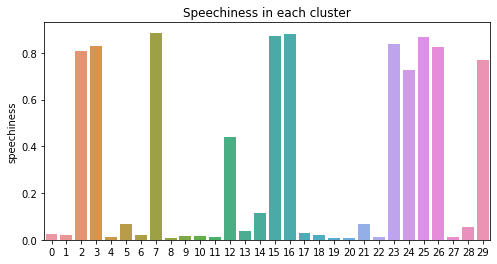

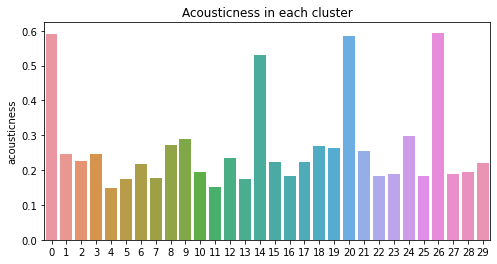

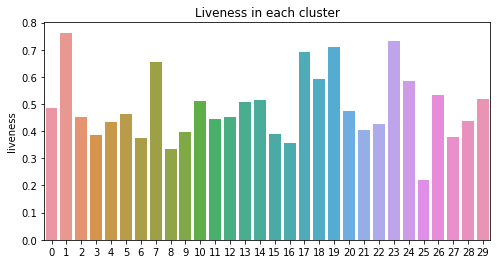

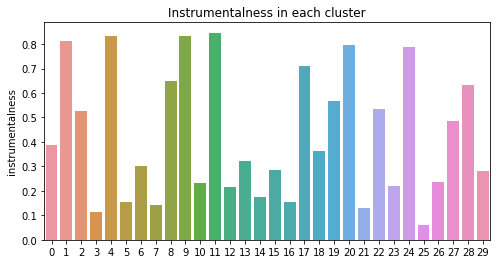

In [ ]:
# plotting through the clusters

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="danceability")
plt.title("Danceability in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="energy")
plt.title("Energy in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="valence")
plt.title("Valence in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="tempo")
plt.title("Tempo in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="loudness")
plt.title("Loudness in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="speechiness")
plt.title("Speechiness in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="acousticness")
plt.title("Acousticness in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="liveness")
plt.title("Liveness in each cluster")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="instrumentalness")
plt.title("Instrumentalness in each cluster")
plt.show()

<AxesSubplot:>

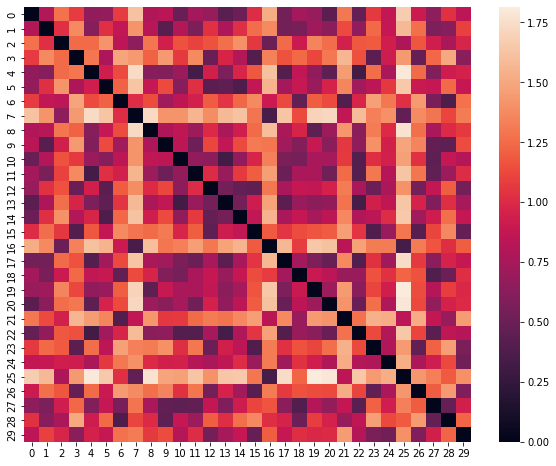

In [ ]:
# creating seaaborn heatmap
def euclidean_distance(data, cluster, cluster_to_compare): 
    distance = (
        pd.DataFrame({
            "cluster_1":data.loc[cluster,:],
            "cluster_2":data.loc[cluster_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.cluster_1 - x.cluster_2)**2)
        .agg({"dist_abs":"sum"})[0]**0.5
    )
    return distance

distances = [[euclidean_distance(scaled_df_centroids, cluster, cluster_to_compare) for cluster in scaled_df_centroids.index] for cluster_to_compare in scaled_df_centroids.index]
eucl_dist = pd.DataFrame(distances, columns=scaled_df_centroids.index, index=scaled_df_centroids.index)
plt.subplots(figsize=(10, 8))
sns.heatmap(eucl_dist)

The heatmap showing us that:
- Cluster 0 and 2 are much similar
- Cluster 1 is much unique with other two

In [ ]:
scaled_df.loc[scaled_df["clusters"] == 0].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Cali in a Cup,Woods,0.193727,0.842688,0.817536,0.257498,0.005638,0.000895,0.455804,0.603273,0.291382,0
Blackeye,Love Inks,0.326265,0.835674,0.715644,0.130212,0.326633,0.175635,0.702141,0.326704,0.489183,0
Every Time the Sun Comes Up,Sharon Van Etten,0.603490,0.797598,0.568035,0.055962,0.000713,0.125888,0.632909,0.598094,0.422782,0
Girl,Jamie xx,0.399161,0.578163,0.716118,0.129481,0.004161,0.001228,0.446144,0.441682,0.560019,0
My Number,Foals,0.402474,0.729463,0.798349,0.027067,0.003618,0.009604,0.518596,0.324632,0.603477,0


In [ ]:
scaled_df.loc[scaled_df["clusters"] == 1].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Brigas Nunca Mais,Paula Morelenbaum,0.698476,0.546099,0.567054,0.063643,0.400000,0.077157,0.228788,0.643671,0.789910,1
Mariana,Seu Jorge,0.613431,0.526059,0.594599,0.054865,0.540704,0.394924,0.151505,0.944065,0.775467,1
Já Sei Namorar - 2004 Digital Remaster,Tribalistas,0.671968,0.822648,0.728300,0.125823,0.673367,0.001168,0.194977,0.842552,0.637957,1
Berekerê - Voice,Geraldo Azevedo,0.411310,0.573153,0.575480,0.160936,0.834171,0.000000,0.076477,0.793868,0.803303,1
Xico,Luisa Sobral,0.420146,0.560127,0.676052,0.425750,0.472362,0.000016,0.541137,0.623990,0.849587,1


In [ ]:
scaled_df.loc[scaled_df["clusters"] == 2].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Blue Bossa - Remastered,Joe Henderson,0.462116,0.432874,0.619268,0.111924,0.611055,0.704569,0.156336,0.908846,0.245253,2
Batida Diferente,Cannonball Adderley,0.600177,0.484978,0.585124,0.104609,0.880402,0.853807,0.185316,0.698571,0.351456,2
O Amor Em Paz,Cannonball Adderley,0.685222,0.280572,0.530337,0.042063,0.977889,0.897462,0.167606,0.431324,0.467495,2
Corcovado - Remastered,Cannonball Adderley,0.783521,0.277566,0.374539,0.089612,0.723618,0.671066,0.455804,0.748291,0.501242,2
Triste,Brazilian Jazz,0.605699,0.339689,0.560252,0.041697,0.910553,0.872081,0.139430,0.455148,0.378814,2


In [ ]:
scaled_df.loc[scaled_df["clusters"] == 3].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Alright,Big Surr,0.358295,0.995992,0.981253,0.236650,0.326633,0.898477,0.349541,0.047959,0.360453,3
Rage Valley,Knife Party,0.411310,0.962926,0.856790,0.378200,0.000302,0.745178,0.151505,0.213797,0.529929,3
Pulp Fiction,Alex Reece,0.762536,0.635276,0.685256,0.948793,0.017990,0.874112,0.086943,0.035219,0.726557,3
Pull the Plug,Death,0.181577,0.978958,0.760719,0.681785,0.000004,0.541117,0.052649,0.230371,0.369804,3
Graves of the Fathers,Cryptopsy,0.220234,0.982966,0.802342,0.656181,0.000005,0.869036,0.368862,0.282163,0.363074,3


In [ ]:
scaled_df.loc[scaled_df["clusters"] == 4].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
Agua De Beber,Sophie Milman,0.660923,0.759523,0.665257,0.077176,0.244221,0.002305,0.104170,0.704786,0.320770,4
Alegria,Batida,0.721670,0.691387,0.651619,0.235187,0.003327,0.221320,0.194977,0.753470,0.578690,4
Tirei o Chapéu,Batida,0.732715,0.927857,0.706338,0.208120,0.000547,0.000000,0.052005,0.832194,0.572772,4
The Day That Thatcher Dies,Hefner,0.568147,0.963928,0.820920,0.290417,0.192965,0.000000,0.122525,0.975140,0.586861,4
New Slang,The Shins,0.586923,0.943889,0.802206,0.072421,0.133668,0.000044,0.059411,0.856018,0.578764,4


In [ ]:
scaled_df.loc[scaled_df["clusters"] == 5].head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
name,artist,,,,,,,,,,
"Love Is a Hurtin' Thing - 12"" Version",Gloria Ann Taylor,0.275458,0.867737,0.778620,0.209949,0.047437,0.000070,0.134278,0.074891,0.548979,5
Flames (with ZAYN) - R3HAB & Skytech VIP Remix,R3HAB,0.324056,0.789582,0.807113,0.520849,0.014874,0.000000,0.039607,0.154755,0.233636,5
Stronger,Kanye West,0.339518,0.785574,0.742445,0.648866,0.003005,0.000000,0.314120,0.438575,0.380106,5
'Till I Collapse,Eminem,0.537221,0.847698,0.845048,0.597659,0.062513,0.000000,0.113830,0.083282,0.798696,5
Duality,Slipknot,0.322951,0.982966,0.852188,0.531822,0.000238,0.000298,0.310900,0.180651,0.626855,5


In [ ]:
features = ["danceability", "energy", "loudness", "valence", "tempo","speechiness", "acousticness","instrumentalness","liveness"]

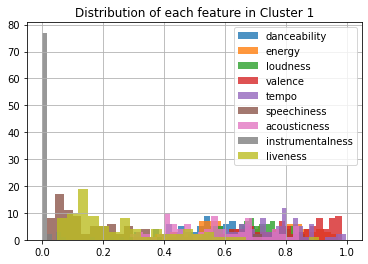

In [ ]:
for feature in features:
  scaled_df[scaled_df['clusters'] == 1][feature].hist(bins=25, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 1')

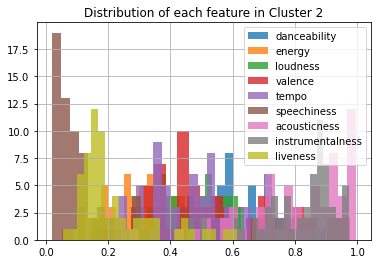

In [ ]:
for feature in features:
  scaled_df[scaled_df['clusters'] == 2][feature].hist(bins=25, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 2')

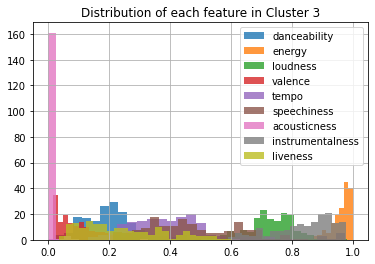

In [ ]:
for feature in features:
  scaled_df[scaled_df['clusters'] == 3][feature].hist(bins=25, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 3')

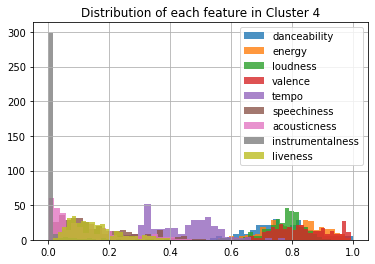

In [ ]:
for feature in features:
  scaled_df[scaled_df['clusters'] == 4][feature].hist(bins=25, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 4')

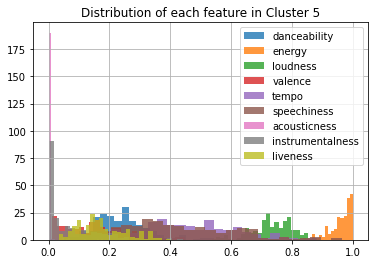

In [ ]:
for feature in features:
  scaled_df[scaled_df['clusters'] == 5][feature].hist(bins=25, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 5')